In [1]:
#set up

import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np

import os

# Problem 1

In [2]:
def moment(X, p=0, q=0):
    assert isinstance(X, np.ndarray), "`X` should be an ndarray"
    
    # Initiate x, y indexes for summation
    x_idx = np.arange(X.shape[1])
    y_idx = np.arange(X.shape[0])
    
    # Compute the first three moments
    m_00 = np.sum(X)
    m_10 = np.sum(X @ x_idx)
    m_01 = np.sum(y_idx @ X)
    
    if p == 0 and q == 0:
        return m_00
    elif p == 1 and q == 0:
        return m_10
    elif p == 0 and q == 1:
        return m_01
    
    # Compute the centroids
    x_bar = m_10 / m_00
    y_bar = m_01 / m_00
    
    # Compute other central moments
    m_pq = (y_idx - y_bar)**q @ X @ (x_idx - x_bar)**p
    
    # Compute similitude moment
    power = (p + q) / 2 + 1
    moment = m_pq / m_00**power
    
    return moment

def similitude_moments(X):
    assert isinstance(X, np.ndarray), "`X` should be an ndarray"
    
    N = [moment(X, p=0, q=2),
         moment(X, p=0, q=3),
         moment(X, p=1, q=1),
         moment(X, p=1, q=2),
         moment(X, p=2, q=0),
         moment(X, p=2, q=1),
         moment(X, p=3, q=0),
        ]
    
    return N

In [3]:
def normalize_image(X):
    assert isinstance(X, np.ndarray), "`X` should be an ndarray"

    return X if np.sum(X) == 0 else (X - np.min(X)) / (np.max(X) - np.min(X))

In [4]:
folder = './input'
files = os.listdir(folder)
files.remove('eigdata.txt')
box_filepath = [os.path.join(folder, file) for file in files]
boxes = [imread(image) for image in box_filepath]

boxes[0].shape, np.sum(boxes[0])

((150, 200), 846855)

In [5]:
normalized_boxes = [normalize_image(image) for image in boxes]

normalized_boxes[0].shape, np.sum(normalized_boxes[0])

((150, 200), 3321.0)

In [6]:
Nvals = [similitude_moments(image) for image in normalized_boxes]

Nvals

[[0.04215597711532671, 0.0, 0.0, 0.0, 0.1646090534979424, 0.0, 0.0],
 [0.04215597711532671, 0.0, 0.0, 0.0, 0.1646090534979424, 0.0, 0.0],
 [0.04226884226884227, 0.0, 0.0, 0.0, 0.1641025641025641, 0.0, 0.0],
 [0.1646090534979424, 0.0, 0.0, 0.0, 0.04215597711532671, 0.0, 0.0]]

In [7]:
normalized_boxes

[array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])]

# Problem 2

In [8]:
data = np.genfromtxt('./input/eigdata.txt')

In [9]:
m = np.mean(data, axis=0)
transformed_data = data - m

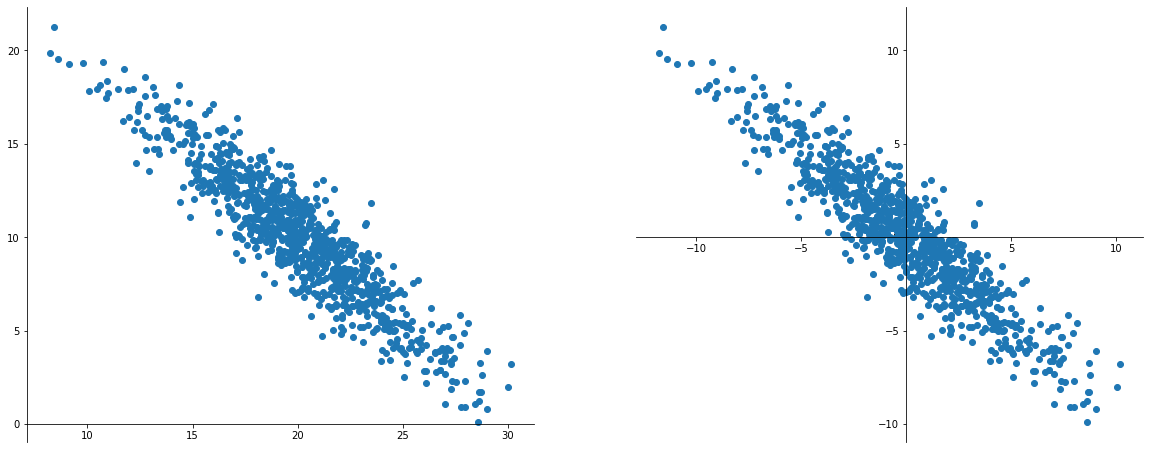

In [10]:
plt.rcParams['figure.figsize'] = (20, 8)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(data[:,0], data[:,1], 'o')
# ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
# ax1.yaxis.tick_left()
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()
# ax1.axhline(y=0, color='k')
# ax1.axvline(x=0, color='k')

ax2.plot(transformed_data[:,0], transformed_data[:,1], 'o')
ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.yaxis.tick_left()
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_color('none')
ax2.xaxis.tick_bottom()
# ax2.axhline(y=0, color='k')
# ax2.axvline(x=0, color='k')

plt.show()

# Problem 3

In [11]:
covariance = np.cov(transformed_data, rowvar=False, bias=True)
eigVals, eigVecs = np.linalg.eig(covariance)
eigVals = np.diag(eigVals)

covariance, eigVecs@eigVals@eigVecs.T

(array([[ 12.74384644, -11.54916165],
        [-11.54916165,  12.38370215]]),
 array([[ 12.74384644, -11.54916165],
        [-11.54916165,  12.38370215]]))

In [12]:
def plot_vector(vector, color, ax):
    assert len(vector) == 2, "`vector` should be 2-D, i.e. [x, y]"
    
    x1=[0, vector[0]]
    y1=[0, vector[1]]
    
    ax.plot(x1, y1, color=color)

In [13]:
def plot_original(K, ax, C=9):
    assert isinstance(K, np.ndarray), "`K` should be an ndarray"
    assert K.shape == (2, 2), "`K` should be a 2x2 ndarray"
    
    origin = np.array([[0, 0],[0, 0]]) # origin point

    # Eigen-decomposition
    eigVals, eigVecs = np.linalg.eig(K)
    eigVals = np.diag(eigVals)
    
    scale_y = np.sqrt(eigVals[0,0] * C)
    scale_x = np.sqrt(eigVals[1,1] * C)
    
    # Plot eigen-vectors
    axis1 = scale_y * eigVecs[:,0]
    axis2 = scale_x * eigVecs[:,1]

    plot_vector(axis1, 'r', ax)
    plot_vector(axis2, 'r', ax)
    
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = scale_x * np.cos(t)
    y = scale_y * np.sin(t)
    
#     plt.plot(x, y, 'b')
    
    coord = np.vstack((y,x))
    trans_coord = eigVecs @ coord
    trans_x = trans_coord[0]
    trans_y = trans_coord[1]
    
    ax.plot(trans_x, trans_y, 'r')
    
    
#     trans_axis1 = eigVecs @ axis1
#     trans_axis2 = eigVecs @ axis2
    
#     plot_vector(trans_axis1, 'b')
#     plot_vector(trans_axis2, 'b')

In [14]:
def plot_transformed(K, ax, C=9):
    assert isinstance(K, np.ndarray), "`K` should be an ndarray"
    assert K.shape == (2, 2), "`K` should be a 2x2 ndarray"
    
    origin = np.array([[0, 0],[0, 0]]) # origin point

    # Eigen-decomposition
    eigVals, eigVecs = np.linalg.eig(K)
    eigVals = np.diag(eigVals)
    
    scale_y = np.sqrt(eigVals[0,0] * C)
    scale_x = np.sqrt(eigVals[1,1] * C)
    
    # Plot eigen-vectors
    axis1 = scale_y * eigVecs[:,0]
    axis2 = scale_x * eigVecs[:,1]

#     plot_vector(axis1, 'r', ax)
#     plot_vector(axis2, 'r', ax)
    
    # Create original set of unit vectors
    t = np.linspace(0, 2*np.pi, 100)
    x = scale_x * np.cos(t)
    y = scale_y * np.sin(t)
    
    ax.plot(x, y, 'r')
    
    coord = np.vstack((x,y))
    trans_coord = eigVecs @ coord
    trans_x = trans_coord[0]
    trans_y = trans_coord[1]
    
#     ax.plot(trans_x, trans_y, 'r')
    

    trans_axis1 = eigVecs @ axis1
    trans_axis2 = eigVecs @ axis2
    print(trans_axis1)
    
    plot_vector(trans_axis1, 'r', ax)
    plot_vector(trans_axis2, 'r', ax)

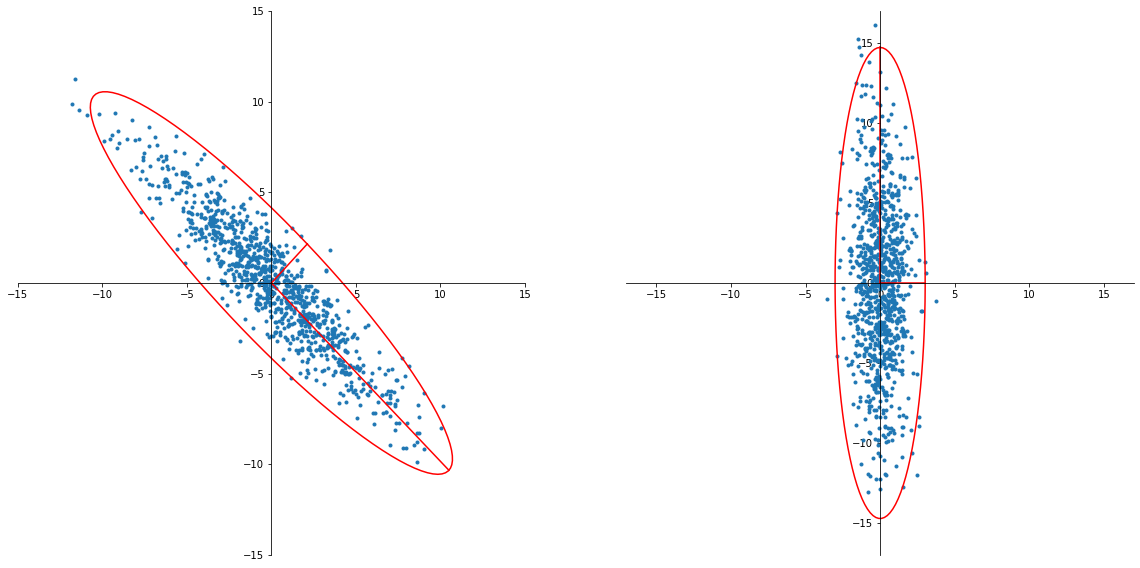

In [15]:
plt.rcParams['figure.figsize'] = (20,10)

fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(transformed_data[:,0], transformed_data[:,1], '.')

plot_original(covariance, ax1)

ax1.set_xlim([-15, 15])
ax1.set_ylim([-15, 15])
ax1.spines['left'].set_position('zero')
ax1.spines['right'].set_color('none')
ax1.yaxis.tick_left()
ax1.spines['bottom'].set_position('zero')
ax1.spines['top'].set_color('none')
ax1.xaxis.tick_bottom()

coord = np.vstack((transformed_data[:,0],transformed_data[:,1]))
trans_coord = eigVecs @ coord
trans_x = trans_coord[0]
trans_y = trans_coord[1]
ax2.plot(trans_x, trans_y, '.')

ax2.spines['left'].set_position('zero')
ax2.spines['right'].set_color('none')
ax2.yaxis.tick_left()
ax2.spines['bottom'].set_position('zero')
ax2.spines['top'].set_color('none')
ax2.xaxis.tick_bottom()

eigVecs = eigVecs.T
decorrelated = (eigVecs @ transformed_data.T).T
decorrelated_covariance = np.cov(decorrelated, rowvar=False, bias=True)

plot_original(np.flip(decorrelated_covariance), ax2)
# plot_transformed(covariance, ax2)

ax2.set_xlim([-17, 17])
ax2.set_ylim([-17, 17])


plt.show()

In [16]:
decorrelated_covariance

array([[2.41143397e+01, 1.12976295e-15],
       [1.12976295e-15, 1.01320891e+00]])

In [17]:
np.flip(decorrelated_covariance)

array([[1.01320891e+00, 1.12976295e-15],
       [1.12976295e-15, 2.41143397e+01]])

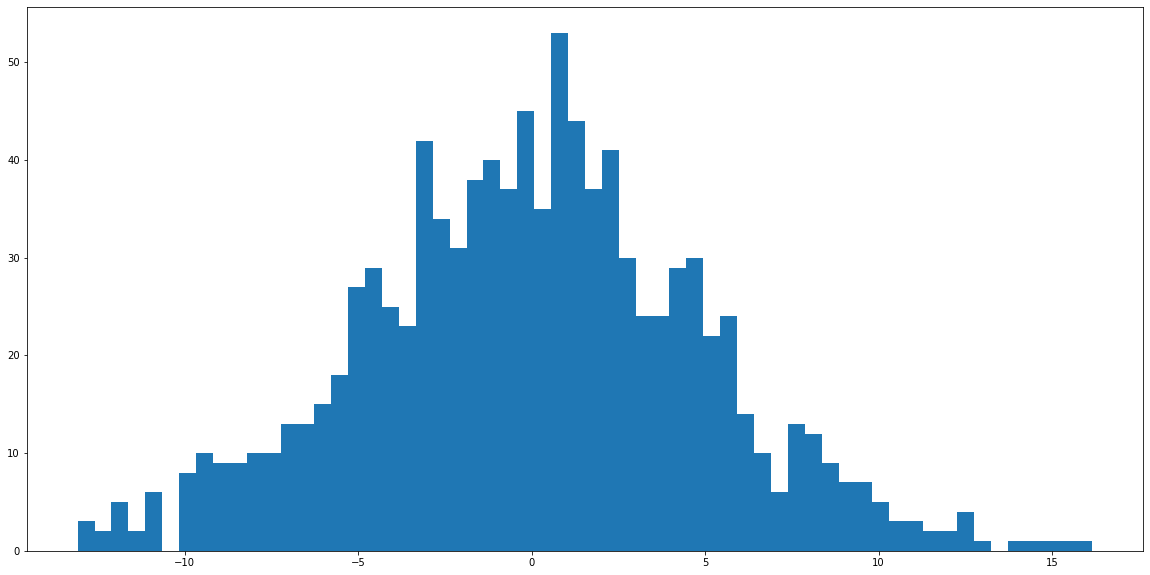

In [18]:
plt.hist(trans_y, bins=60)
plt.show()